# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Шаг 1. Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('games.csv')

In [3]:
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Шаг 1. Общий вывод.**

*Описание данных*

Данные представлены 16715 строками. 

Всего 11 столбцов:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год, согласно вводным данным, могут быть неполными.

В рамках данного раздела мы открыли файл с данными, полученный из открытых источников относительно продаж игр на различных игровых платформах с разбивкой на жанры, продажи по 3 регионам и отображением рейтингов и отзывов пользователей и критиков.

В данных содержатся пропуски и некорректный тип у некоторых ячеек, поэтому для дальнейшей корректной работы с файлом во втором шаге проведем предварительную обработку данных. 



## Шаг 2. Подготовка данных

### 1. Заменим названия столбцов (приведем к нижнему регистру)

In [5]:
data.columns = data.columns.str.lower()

### 2. Преобразуем данные в нужные типы и заменим пропуски.

Корректировка типов данных: 

    1. Год релиза - в формат даты в виде года
    2. Оценка пользователя - во float, т.к. это оценка, а не текст

Проверим, какие столбцы имеют пустые значения.

In [6]:
print(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Заполнение пропусков:

    1. Пропуски в навзании, жанре и году релиза удалим, так как количество несуществено. К тому же, у нас нет обоснований для заполнения этих данных самостоятельно. Причиной пропусков может являться некорректная выгрузка из базы данных - какие-то значения могли технически не "подтянуться" в таблицу. 
    2. Оценки критиков и пользователей не будем заполнять значениями, так как пропусков много и заполнение данных медианой/средним  может только исказить результаты корреляционного анализа. Причиной пропусков может являться то, что оценка не производилась в целом по данной игре, либо также может быть ошибка с технической стороны при выгрузке данных в таблицу. 
    3. Пропуски в рейтинге автозаполнить не сможем, заменим на "заглушку". Пропуск может быть объясним как отсутствием присовенного рейтинга ассоциацией, так и невозможностью подгрузить этот рейтинг в сводную таблицу. 

In [7]:
data = data.dropna(subset = ['name', 'genre', 'year_of_release']).reset_index(drop=True) # удаляем пустые значения

In [8]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format = '%Y').dt.year # меняем тип данных

In [9]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') 

# используем coerce, так как в строках есть данные со значением 'tbd', что не позволяет изменить тип данных. 
# у нас нет информации, о чем конкретно говорит это значение 
# (как предположение это сокращение аббревиатуры 'to be discussed', которое заполняли пользователи, когда не были уверены в оценке), 
# поэтому нам подходит замена данного значения на NaN, что предусмотрено в этом параметре

In [11]:
data['rating']=data['rating'].fillna('Нет рейтинга') # меняем пустые значения на "заглушку"

Проверим, что все типы данных теперь отражены корректно и пропуски заполнены там, где мы планировали. 

In [12]:
data.info() # смотрим типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [13]:
print(data.isna().sum()) # проверяем пропуски

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64


In [14]:
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Нет рейтинга
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Нет рейтинга


Все правки отображены корректно.

Посчитаем суммарные продажи во всех регионах. 

In [15]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [16]:
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Нет рейтинга,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Нет рейтинга,31.38


### 3. Проверим наличие дубликатов в играх

1. Явные дубликаты

In [17]:
duplicated_data_all=data[data.duplicated()]
display(duplicated_data_all)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


Явных дубликатов в датасете не выявлено. 

2. Неявные дубликаты. 

In [18]:
# выведем список полных дубликатов игр (одно и то же название на одинаковых платформах)
duplicated_data_specific=data[data.duplicated(subset = ['name','platform'])]
display(duplicated_data_specific) 


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1574,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T,1.25
11534,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T,0.08
15969,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E,0.01


Видим, что в дубликаты попалась игра Need For Speed на x360 некорректно - т.к. у игр разные даты выхода. Поэтому доабвим еще столбец с датой релиза, чтобы не удалить лишнее.

In [19]:
duplicated_data_specific=data[data.duplicated(subset = ['name','platform', 'year_of_release'])]
display(duplicated_data_specific) # выведем список полных дубликатов игр 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15969,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E,0.01


Видим, что одна и та же игра была дважды учтена, поэтому удалим ее.

In [20]:
data =data.drop_duplicates(subset = ['name','platform', 'year_of_release'])

Убедимся, что была удалена только одна игра, как и планировали.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


**Шаг 2. Общий вывод.**

Мы удалили столбцы с пропусками, заменили типы данных, где это было необходимо. Проверили датасет на наличие дубликатов и удалили неявные дубликаты. Все данные подготовлены для дальнейшего корректного анализа.

Также был рассчитан показатель суммарные продажи и добавлен отдельным столбцом в таблицу для дальнейшего анализа. 

## Шаг 3. Исследовательский анализ данных

### 1. Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

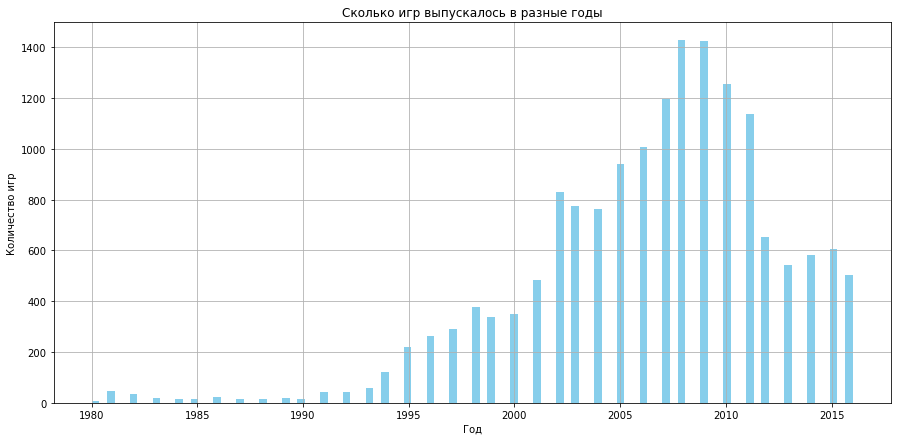

In [22]:
data['year_of_release'].hist(bins = 100, figsize = (15, 7), color='#87CEEB')

plt.title('Сколько игр выпускалось в разные годы')
plt.xlabel('Год') 
plt.ylabel('Количество игр')
plt.show()

Активный пик роста выпуска игр начался с 2000-х годов. 

Наверное, наиболее актуальными данными будет данные с ~ 2014 по 2016 год - этот период отражает текущие тенденции рынка игр.

При этом данные до 1995 являются абсолютно неактуальными, так как игры только начинали появляться, не были популярными в том числе в силу отсутствия технических мощностей для их развития и их количество не сопоставимо ни с одним из периодов за последние 20 лет.

В 2000-х годах произошел резкий скачок уровня аппаратных возможностей игрового «железа», что спровоцировало больший рост компьютерных игр, на рынке появились новые игроки (например, Microsoft с X360), действующие игроки начали обновлять свои консоли (например, Sony с PS2, PS3). Игры стали доступнее, появилась альтернатива в виде персональных компьютеров. 

С 2010-х годов наблюдается снижение спроса на компьютерные игры в целом по перечисленным платформам, потому что мобильные платформы создали новый канал продаж. В дополнение к геймерам-любителям, целенаправленно покупающим консоль или игры к компьютеру, появляется категория «человек коротает время в метро по дороге на работу, играя на своем смартфоне». Это привело к функциональному упрощению игр, чтобы адаптировать их под ограниченные возможности телефона по сравнению с джойстиком или клавиатурой. Интерес пользователей сместился в эту сферу, что отразилось на падении продаж компьютер игр на различных платформах. 

### 2. Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


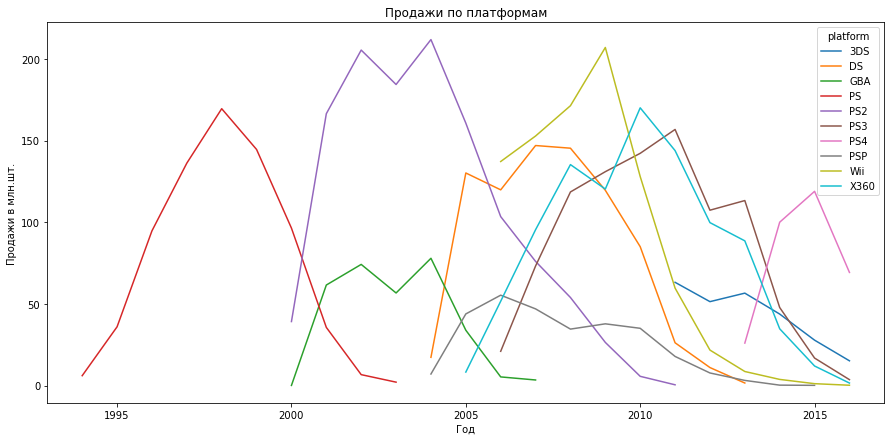

In [23]:
#соберем данные по платформам и отсортируем по продажам
filtered_by_platform = data.pivot_table(index='platform', values='total_sales', aggfunc= 'sum')\
.sort_values('total_sales', ascending=False)

#создадим список из первых 10 топ платформ
new = filtered_by_platform.index[:10].tolist()

#создадим датасет по выбранным платформам
top10 = data.query('platform == @new')

#построим график продаж среди этих платформ по годам
pd.pivot_table(top10 , index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.plot(figsize=(15,7), xlim=(1993,2017))

plt.title('Продажи по платформам')
plt.xlabel('Год') 
plt.ylabel('Продажи в млн.шт.')
plt.show()

In [24]:
#считаем продолжительность "жизни" платформы по разнице максимального и минимального года релиза
platform_max = data.groupby('platform')['year_of_release'].max()
platform_min = data.groupby('platform')['year_of_release'].min()
platform_lifetime = platform_max - platform_min
display(platform_lifetime.sort_values(ascending=False))
display(platform_lifetime.mean())
display(platform_lifetime.median())

platform
PC      31
DS      28
GB      13
X360    11
PSP     11
PS2     11
NES     11
DC      10
Wii     10
PS3     10
2600     9
SNES     9
PS       9
XB       8
GBA      7
GC       6
N64      6
3DS      5
PSV      5
SAT      5
WiiU     4
GEN      4
NG       3
XOne     3
PS4      3
WS       2
3DO      1
SCD      1
TG16     0
PCFX     0
GG       0
Name: year_of_release, dtype: int64

7.612903225806452

6.0

По данным графика и талблицы, средний срок "жизни" игровых платформ составляет 6-7 лет. Есть платформы, которые наиболее популярны (нарпимер, X360, PS2, PS3) и живут дольше - в среднем 10-13 лет.

### 3. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Так как рынок игровых плтаформ очень динамичен, то актуальный период определим следующим образом: 
1. крайняя дата - 2016 год 
2. начальная дата - 2014 год. 

Теперь посчитаем, какие платформы лидируют в этом периоде. Ограничимся топ-5 самых популярных платформ (они занимают порядка 87% от всех проданных копий игр), чтобы графики были более наглядными и доступными к анализу. 

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22


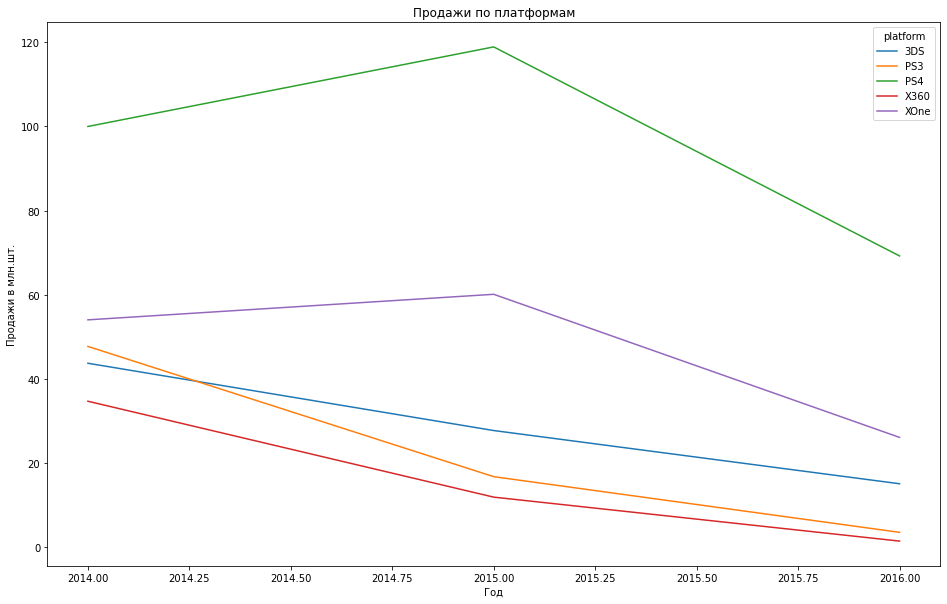

In [25]:
#смотрим какие платформы популярны в этот период

top5_platforms_2014_2016 = data.query('year_of_release >=2014')\
.pivot_table(index='platform', values='total_sales', aggfunc= 'sum')\
.sort_values('total_sales', ascending=False)

display(top5_platforms_2014_2016.head())

#создадим список из первых 5 топ платформ
top_5_list = top5_platforms_2014_2016.index[:5].tolist()


#создадим датасет по выбранным платформам
top_5 = data.query('platform == @top_5_list and year_of_release>=2014')


#строим график по динамике продаж по каждой из платформ за актуальный период
pd.pivot_table(top_5, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.plot(figsize=(16,10))
plt.title('Продажи по платформам')
plt.xlabel('Год') 
plt.ylabel('Продажи в млн.шт.')
plt.show()

Наиболее популярными платформами, исходя из оценки их выручки, являются: 
1. PS4
2. XOne
3. 3DS
4. PS3
5. X360

Как видим из графика, у всех платформ наблюдается снижение продаж. Исключением могут являться PS4 и XOne, которые показывали рост по итогам 2015 и снижение в 2016 может быть обусловлено неполными данными за этот период.  
В целом динамика обусловлено тем, что это одни из самых новых платформ, в связи с чем интерес к ним может только набирать обороты, при этом остальные плтформы, возможно, уже прошли пик своей популярности и максимума продаж.  

### 4. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

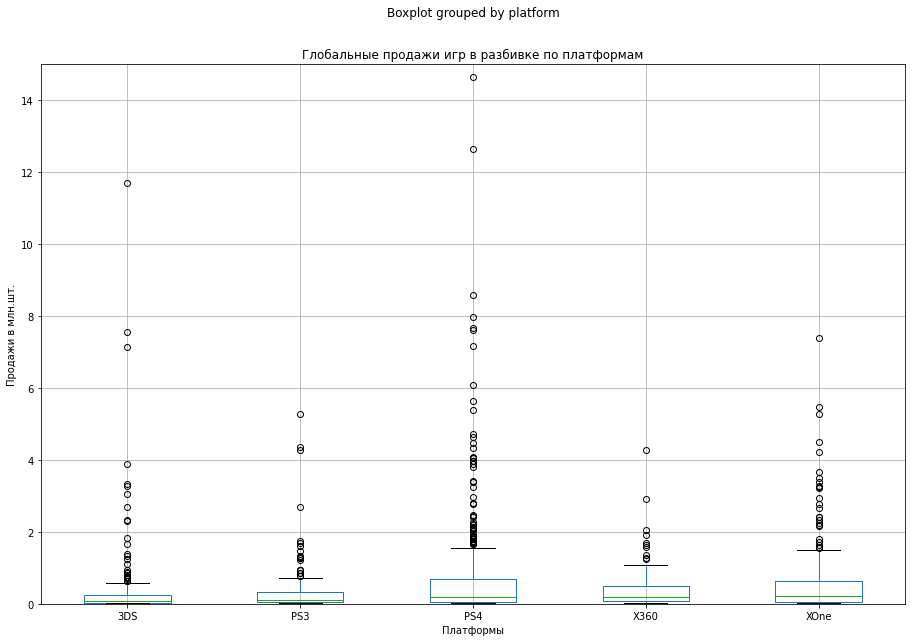

In [26]:
boxplot = top_5.boxplot(column=['total_sales'], by='platform', figsize=(15,10)).set_ylim(0, 15)

plt.title('Глобальные продажи игр в разбивке по платформам')
plt.xlabel('Платформы') 
plt.ylabel('Продажи в млн.шт.')
plt.show()

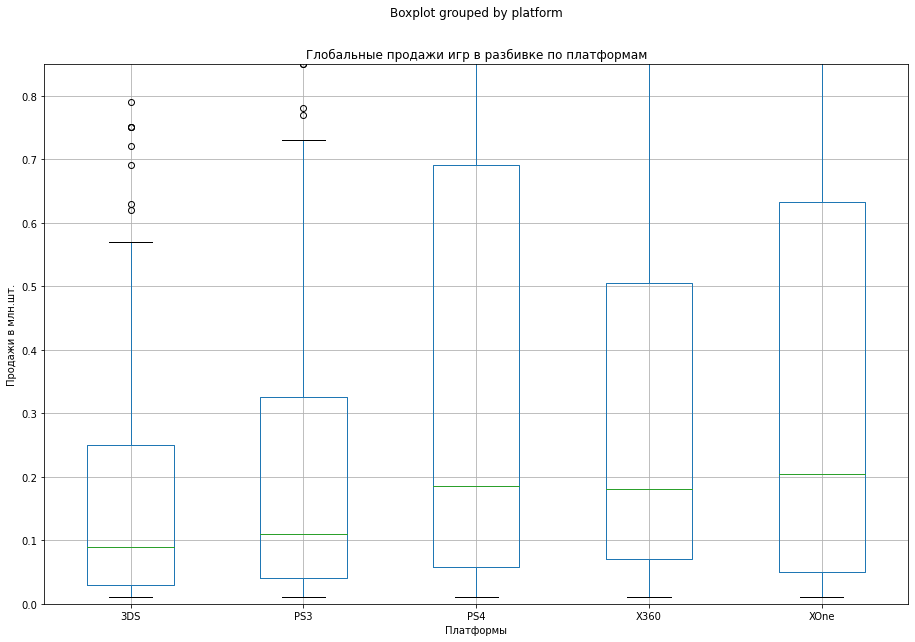

In [27]:
boxplot = top_5.boxplot(column=['total_sales'], by='platform', figsize=(15,10)).set_ylim(0, 0.85)

plt.title('Глобальные продажи игр в разбивке по платформам')
plt.xlabel('Платформы') 
plt.ylabel('Продажи в млн.шт.')
plt.show()

Большая часть продаж находится в зоне, так называемых, выбросов, что обсуловлено спецификой игровой индустрии - компания выпускает некую игру и собирает большие объемы продаж выпуска. Количество игр, которые покупаются долгое время постоянно и равномерно - минимально, что можно и увидеть на графике. 

Согласно увеличенному графику с квартилями, можем видеть, что у PS4 максимальное из представленных платформ количеcтво игр, которые попадают в 75% интервал, при этом максимальная медиана у XOne. 


### 5. Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 

1. X360

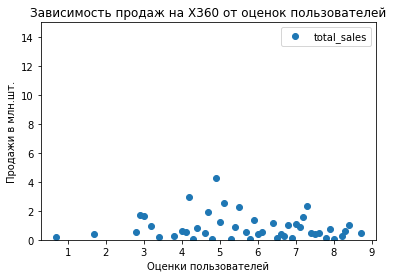

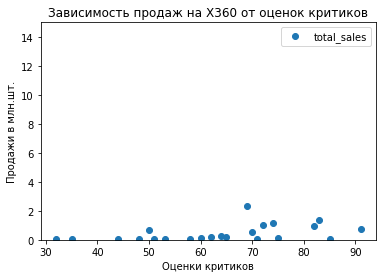

In [28]:
top_5.query('platform == "X360"').pivot_table(index = ['user_score'], values = 'total_sales', aggfunc = 'sum')\
    .plot(style='o', ylim=(0,15))
plt.title('Зависимость продаж на X360 от оценок пользователей')
plt.xlabel('Оценки пользователей') 
plt.ylabel('Продажи в млн.шт.')
plt.show()


top_5.query('platform == "X360"').pivot_table(index = ['critic_score'], values = 'total_sales', aggfunc = 'sum')\
    .plot(style='o', ylim=(0,15))
plt.title('Зависимость продаж на X360 от оценок критиков')
plt.xlabel('Оценки критиков') 
plt.ylabel('Продажи в млн.шт.')
plt.show()



Посчитаем корреляцию по продажам в зависимости от отзывов пользователей и критиков в акутальном периоде. 

In [29]:
top_5_by_platform = top_5.query('platform == "X360"')
top_5_by_platform[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.525723,-0.138445
critic_score,0.525723,1.000000,0.625309
user_score,-0.138445,0.625309,1.000000


Расчет подтвердился диаграмой рассеяния: существенной корреляции между продажами и отзывами пользователей и критиков не выявлено. При этом мы видим, что прямая линейная зависимость сильнее выражена с отзывами критиков, а не с отзывами пользователей. 

2. PS3

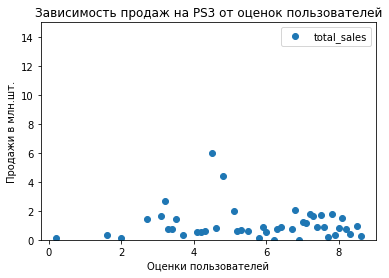

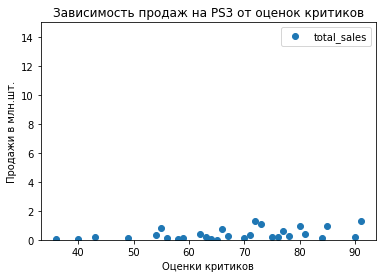

In [30]:
top_5.query('platform == "PS3"').pivot_table(index = ['user_score'], values = 'total_sales', aggfunc = 'sum')\
    .plot(style='o', ylim=(0,15))
plt.title('Зависимость продаж на PS3 от оценок пользователей')
plt.xlabel('Оценки пользователей') 
plt.ylabel('Продажи в млн.шт.')
plt.show()


top_5.query('platform == "PS3"').pivot_table(index = ['critic_score'], values = 'total_sales', aggfunc = 'sum')\
    .plot(style='o', ylim=(0,15))
plt.title('Зависимость продаж на PS3 от оценок критиков')
plt.xlabel('Оценки критиков') 
plt.ylabel('Продажи в млн.шт.')
plt.show()


Посчитаем корреляцию по продажам в зависимости от отзывов пользователей и критиков в акутальном периоде. 

In [31]:
top_5_by_platform = top_5.query('platform == "PS3"')
top_5_by_platform[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.446575,-0.166761
critic_score,0.446575,1.000000,0.693445
user_score,-0.166761,0.693445,1.000000


Расчет подтвердился диаграмой рассеяния: существенной корреляции между продажами и отзывами пользователей и критиков не выявлено. При этом мы видим, что прямая линейная зависимость сильнее выражена с отзывами критиков, а не с отзывами пользователей.

3. XOne

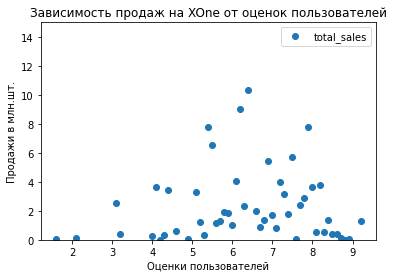

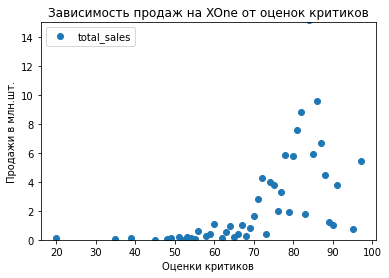

In [32]:
top_5.query('platform == "XOne"').pivot_table(index = ['user_score'], values = 'total_sales', aggfunc = 'sum')\
    .plot(style='o', ylim=(0,15))
plt.title('Зависимость продаж на XOne от оценок пользователей')
plt.xlabel('Оценки пользователей') 
plt.ylabel('Продажи в млн.шт.')
plt.show()


top_5.query('platform == "XOne"').pivot_table(index = ['critic_score'], values = 'total_sales', aggfunc = 'sum')\
    .plot(style='o', ylim=(0,15))
plt.title('Зависимость продаж на XOne от оценок критиков')
plt.xlabel('Оценки критиков') 
plt.ylabel('Продажи в млн.шт.')
plt.show()

Посчитаем корреляцию по продажам в зависимости от отзывов пользователей и критиков в акутальном периоде. 

In [33]:
top_5_by_platform = top_5.query('platform == "XOne"')
top_5_by_platform[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


Расчет подтвердился диаграмой рассеяния: существенной корреляции между продажами и отзывами пользователей и критиков не выявлено. При этом мы видим, что прямая линейная зависимость сильнее выражена с отзывами критиков, а не с отзывами пользователей.

4. 3DS

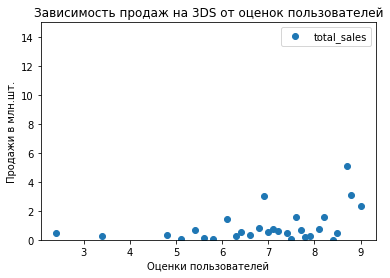

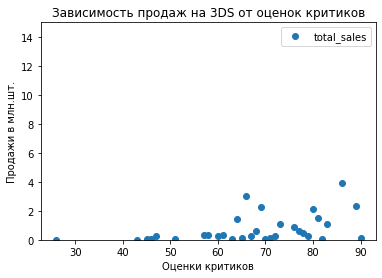

In [34]:
top_5.query('platform == "3DS"').pivot_table(index = ['user_score'], values = 'total_sales', aggfunc = 'sum')\
    .plot(style='o', ylim=(0,15))
plt.title('Зависимость продаж на 3DS от оценок пользователей')
plt.xlabel('Оценки пользователей') 
plt.ylabel('Продажи в млн.шт.')
plt.show()


top_5.query('platform == "3DS"').pivot_table(index = ['critic_score'], values = 'total_sales', aggfunc = 'sum')\
    .plot(style='o', ylim=(0,15))
plt.title('Зависимость продаж на 3DS от оценок критиков')
plt.xlabel('Оценки критиков') 
plt.ylabel('Продажи в млн.шт.')
plt.show()

Посчитаем корреляцию по продажам в зависимости от отзывов пользователей и критиков в акутальном периоде. 

In [35]:
top_5_by_platform = top_5.query('platform == "3DS"')
top_5_by_platform[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.314117,0.215193
critic_score,0.314117,1.000000,0.862485
user_score,0.215193,0.862485,1.000000


Расчет подтвердился диаграмой рассеяния: существенной корреляции между продажами и отзывами пользователей и критиков не выявлено. При этом мы видим, что прямая линейная зависимость сильнее выражена с отзывами критиков, а не с отзывами пользователей.

5. PS4

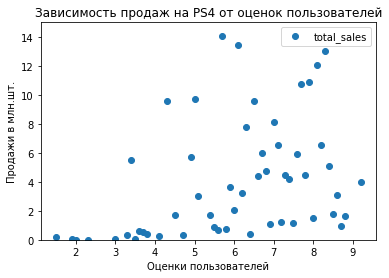

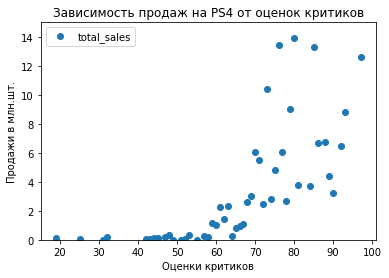

In [36]:
top_5.query('platform == "PS4"').pivot_table(index = ['user_score'], values = 'total_sales', aggfunc = 'sum')\
    .plot(style='o', ylim=(0,15))
plt.title('Зависимость продаж на PS4 от оценок пользователей')
plt.xlabel('Оценки пользователей') 
plt.ylabel('Продажи в млн.шт.')
plt.show()


top_5.query('platform == "PS4"').pivot_table(index = ['critic_score'], values = 'total_sales', aggfunc = 'sum')\
    .plot(style='o', ylim=(0,15))
plt.title('Зависимость продаж на PS4 от оценок критиков')
plt.xlabel('Оценки критиков') 
plt.ylabel('Продажи в млн.шт.')
plt.show()

Посчитаем корреляцию по продажам в зависимости от отзывов пользователей и критиков в акутальном периоде. 

In [37]:
top_5_by_platform = top_5.query('platform == "PS4"')
top_5_by_platform[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


Расчет подтвердился диаграмой рассеяния: существенной корреляции между продажами и отзывами пользователей и критиков не выявлено. При этом мы видим, что прямая линейная зависимость сильнее выражена с отзывами критиков, а не с отзывами пользователей.

**Общий вывод**

В целом, ярко-выраженной линейной зависимости продаж и отзывов не выялвено (ни один из коэффициентов корреляции не превысил даже 0.5). При этом выявлено, что в большинстве случаев, между продажами и отзывами критиков прямая линейная зависимость сильнее, чем между отзывами пользователей.   

### 6. Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Выберем все платформы в актуальном периоде и посмотрим, сколько всего жанров есть, чтобы убедиться, что ничего не пропустим:

In [38]:
actual_data = data.query('year_of_release >= 2014')

In [39]:
len(actual_data['genre'].unique())

12

Посмотрим объем продаж игр в разбивке по жанрам. 

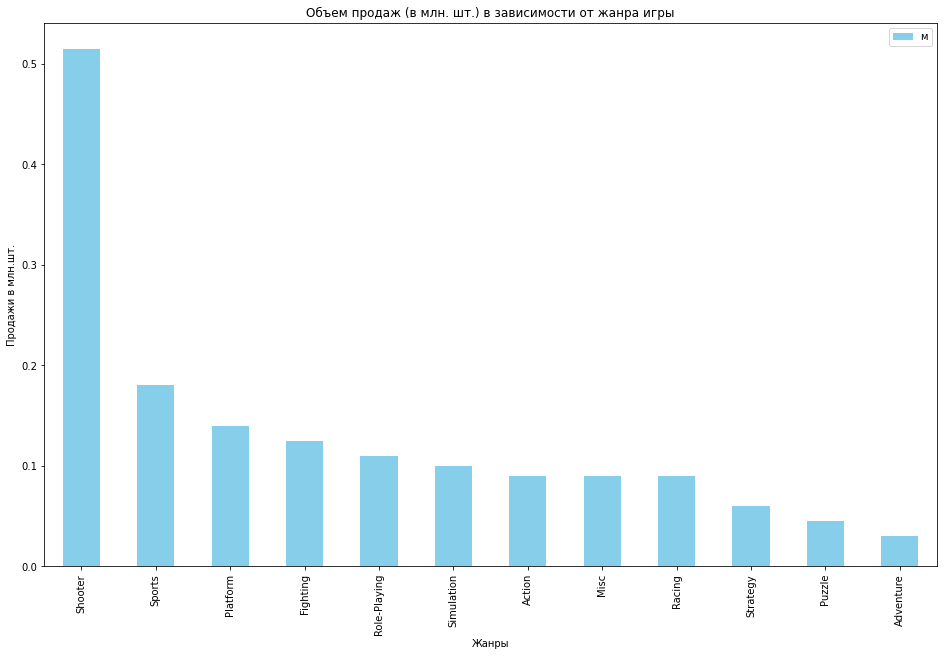

In [40]:
actual_data.groupby(by='genre').agg({'total_sales':'median'})\
                         .sort_values(by='total_sales', ascending=False)\
                         .plot(kind='bar', figsize=(16,10), color=['#87CEEB','#4682B4'])
plt.title('Объем продаж (в млн. шт.) в зависимости от жанра игры')
plt.xlabel('Жанры') 
plt.ylabel('Продажи в млн.шт.')
plt.legend('млн.шт.')
plt.show()

Самый популярный жанр - shooter. 

Всего в топ-5 жаноров также входят: shooter, sports, platform, fighting и role-playing

Наименее популярные жанры:  strategy, puzzle, аdventure. 


**Шаг 3. Общий вывод.**

В рамках данного шага определили актуальный период с 2014 по 2016 (т.к. орасль очень динамично меняется) и пришли к следующим выводам:
1. Общая динамика игр - негативная, количество продаваемых копий последние годы падает, что может быть вызвано смещением фокуса интересов пользователей в сторону, например, мобильных игр.
2. Опредлены наиболее популярные платформы: PS4, XOne, 3DS, PS3, X360. 
3. Выявлено, что между отзывами как критиков, так и пользователей, и продажами нет сильной линейной зависимости, при этом, линейная зависимость с отзывами критиков выражена сильнее, нежели чем с отзывами пользоваталей. 
4. Определено распределние продаж по жанрам: самый популярный - shooter, самый непопулярный - adventure. 

## Шаг 4. Составьте портрет пользователя каждого региона

### 1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.

**Популярные платформы в Северной Америке**

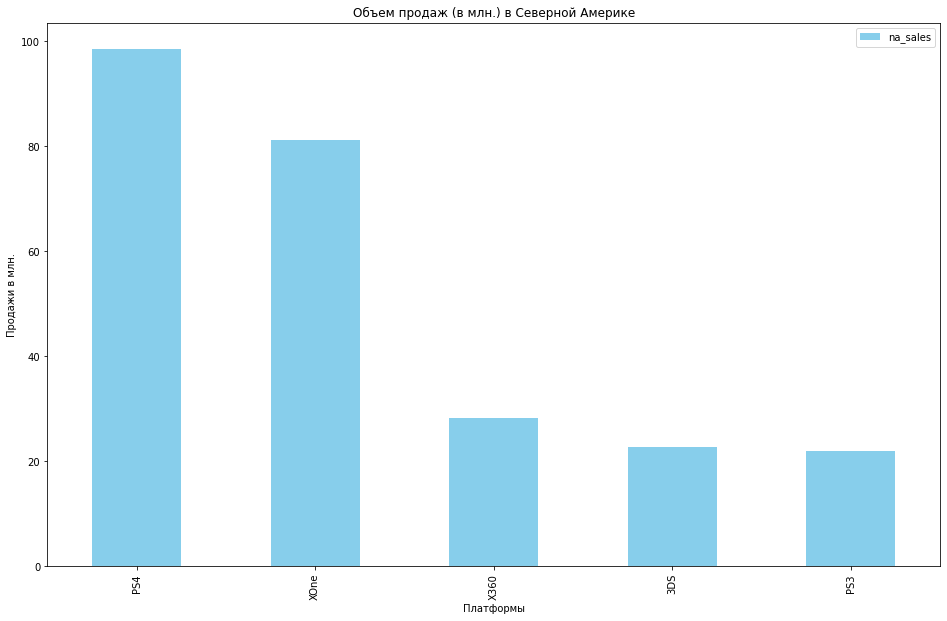

In [41]:
actual_data.groupby(by='platform').agg({'na_sales':'sum'})\
                         .sort_values(by='na_sales', ascending=False).head()\
                         .plot(kind='bar', figsize=(16,10), color = '#87CEEB')
plt.title('Объем продаж (в млн.) в Северной Америке')
plt.xlabel('Платформы') 
plt.ylabel('Продажи в млн.')
plt.show()

**Популярные жанры в Северной Америке**

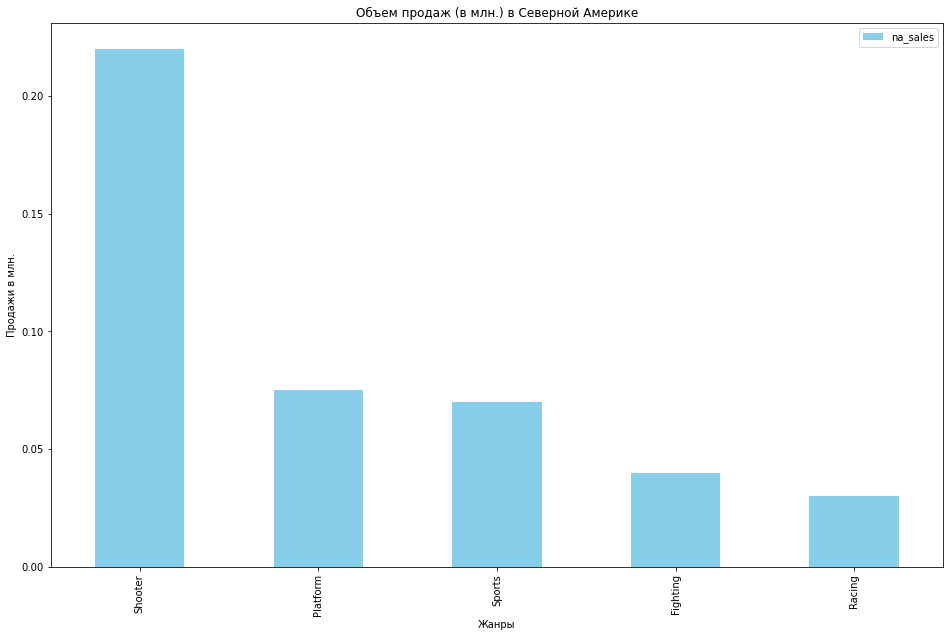

In [42]:
actual_data.groupby(by='genre').agg({'na_sales':'median'})\
                         .sort_values(by='na_sales', ascending=False).head()\
                         .plot(kind='bar', figsize=(16,10), color = '#87CEEB')
plt.title('Объем продаж (в млн.) в Северной Америке')
plt.xlabel('Жанры') 
plt.ylabel('Продажи в млн.')
plt.show()

В Северной Америке самая популярная игровая платформа - PS4, популярный жанр - shooter. 

**Популярные платформы в Европе**

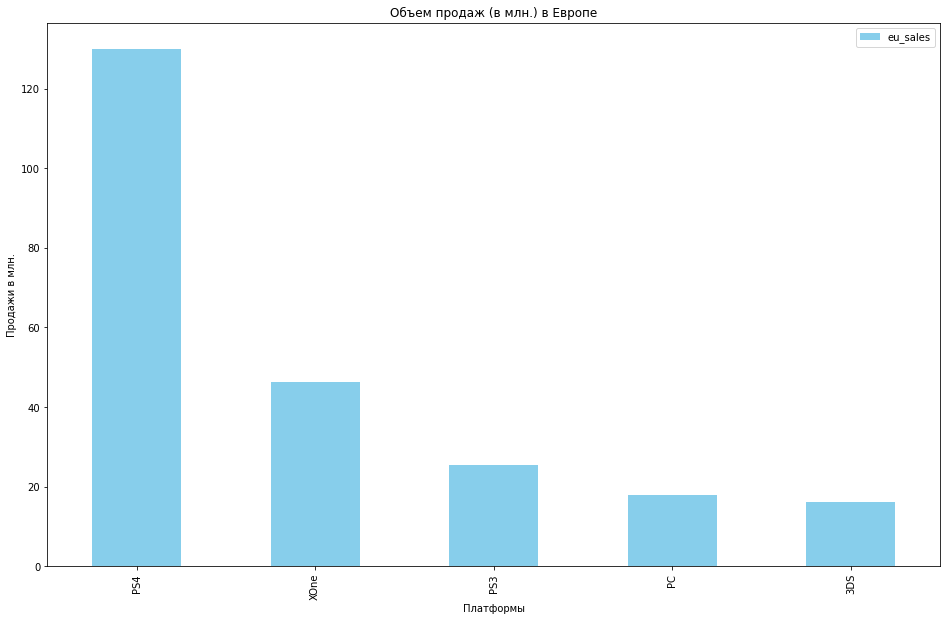

In [43]:
actual_data.groupby(by='platform').agg({'eu_sales':'sum'})\
                         .sort_values(by='eu_sales', ascending=False).head()\
                         .plot(kind='bar', figsize=(16,10), color = '#87CEEB')
plt.title('Объем продаж (в млн.) в Европе')
plt.xlabel('Платформы') 
plt.ylabel('Продажи в млн.')
plt.show()

**Популярные жанры в Европе**

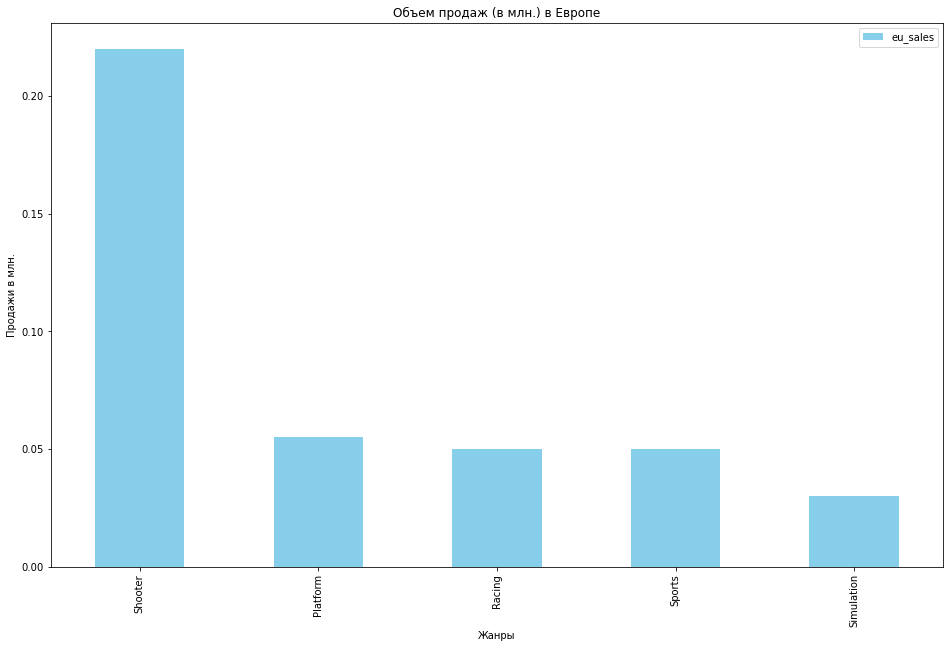

In [44]:
actual_data.groupby(by='genre').agg({'eu_sales':'median'})\
                         .sort_values(by='eu_sales', ascending=False).head()\
                         .plot(kind='bar', figsize=(16,10), color = '#87CEEB')
plt.title('Объем продаж (в млн.) в Европе')
plt.xlabel('Жанры') 
plt.ylabel('Продажи в млн.')
plt.show()

В Европе самая популярная игровая платформа - PS4, популярный жанр - shooter. 

**Популярные платформы в Японии**

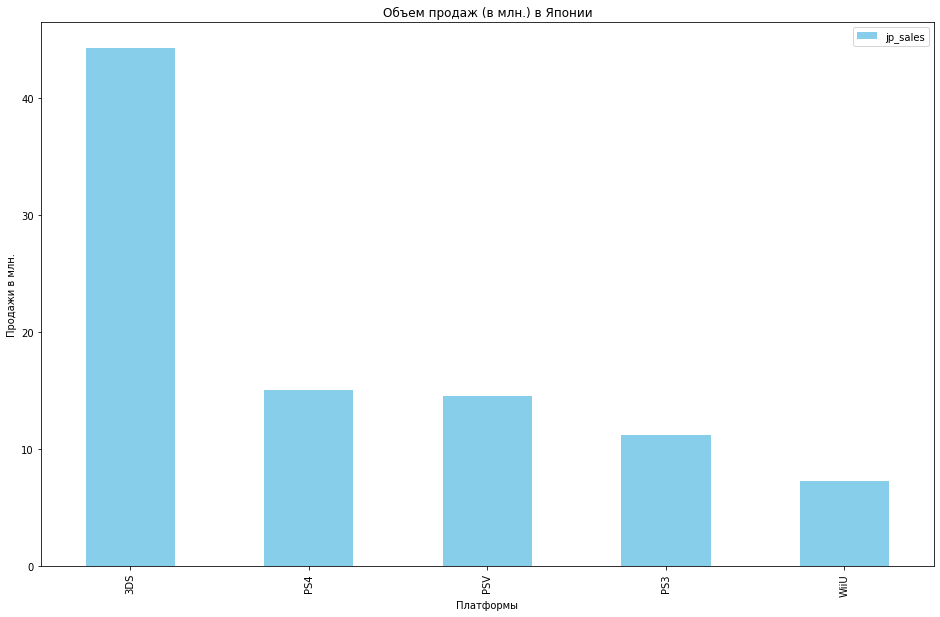

In [45]:
actual_data.groupby(by='platform').agg({'jp_sales':'sum'})\
                         .sort_values(by='jp_sales', ascending=False).head()\
                         .plot(kind='bar', figsize=(16,10), color = '#87CEEB')
plt.title('Объем продаж (в млн.) в Японии')
plt.xlabel('Платформы') 
plt.ylabel('Продажи в млн.')
plt.show()

**Популярные жанры в Японии**

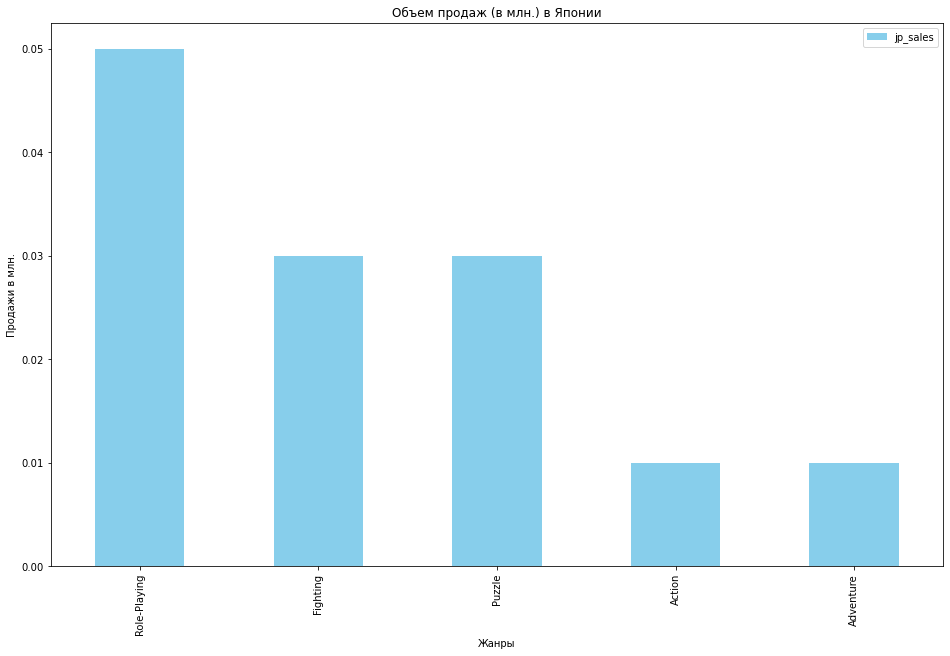

In [46]:
actual_data.groupby(by='genre').agg({'jp_sales':'median'})\
                         .sort_values(by='jp_sales', ascending=False).head()\
                         .plot(kind='bar', figsize=(16,10), color = '#87CEEB')
plt.title('Объем продаж (в млн.) в Японии')
plt.xlabel('Жанры') 
plt.ylabel('Продажи в млн.')
plt.show()

В Японии самая популярная игровая платформа - 3DS, популярный жанр - role-playing. 

**Влияние рейтинга ESRB на продажи в регионе**

In [52]:
by_rating = actual_data.groupby(['rating'])\
.agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum', 'total_sales':'sum'})\
.sort_values(by='total_sales', ascending=False).head(5)
display(by_rating)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
rating,,,,,
M,96.42,93.44,8.01,28.67,226.54
Нет рейтинга,64.72,58.95,56.90,18.40,198.97
E,50.74,58.06,8.94,15.39,133.13
T,38.95,34.07,14.78,11.33,99.13
E10+,33.23,26.16,4.46,7.83,71.68


Cудя по распределению продаж наблюдается вполне логичная закономерность, что в целом по всем данным, с рейтингом M('mature') продается игр больше среди тех, по которым опредлен рейтинг, так как представлена наиболее платежеспособная целевая аудитория.

В Японии большая часть рынка не категоризирована, но на первом месте продажи с рейтингом T('teens'), потому что, вероятно, подростки более погружены в игровую индустрию, чем взрослые (как гипотеза  - это можно объяснить слишком загруженным рабочим графиком у взрослыхв Японии).

В Северной Америке и Европе среди тех, у кого определен рейтинг, большая часть относится к категории М, на втором месте категрия E ('everyone'). 


**Шаг 4. Общий вывод**

1. Популярность платформ отличается от региона присутствия.

В Свеверной Америке и Европе наиболее популярной платформой является PS4, в Японии 3DS.

2. Популярность жанров также разнится от региона присутствия. 

Наиболее поплуярные жанры: Северная Америка и Европа - shooter, Япония - role-playing.

3. Популярность рейтинга также немного разнится в зависимости от региона:

Самые большие продажи среди игр, по которым опредлен рейтинг: в Северной Америке  и Европе у рейтингов M и E, в Японии у Т.


## Шаг 5. Проверка гипотезы

### 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

 - H_o: Средний пользовательский рейтинг Xbox = PC
 - H_1: Средний пользовательский рейтинг Xbox != PC 

Нам нужно проверить гипотезу о равенстве среднего двух ГС по взятым из них выборкам, поэтому исопльзуем t-критерий Стьюдента (метод ttest_ind()).

In [48]:
x360 = actual_data.query('platform == "X360" and user_score>=0')['user_score']

PC = actual_data.query('platform == "PC" and user_score>=0')['user_score']

In [49]:
results = st.ttest_ind(x360,PC,equal_var=False)

alpha = 0.05

# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.0312821899616337
Отвергаем нулевую гипотезу


 С 95% доверительной вероятностью можем утверждать, что средний пользовательский рейтинг на PC не равен среднему пользоватлеьсткому рейтингу на Xbox.  

### 2. Средние пользовательские рейтинги жанров Action  и Sports разные

 - H_o: Средний пользовательский рейтинг Action = Sports
 - H_1: Средний пользовательский рейтинг Action != Sports

In [50]:
action = actual_data.query('genre == "Action" and user_score>=0')['user_score']

sports = actual_data.query('genre == "Sports" and user_score>=0')['user_score']

In [56]:
results = st.ttest_ind(action,sports,equal_var=False)

alpha = 0.05

# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом

if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.1825550382644557e-14
Отвергаем нулевую гипотезу


С 95% доверительной вероятностью можем утверждать, что средний пользовтаельский рейтинг в жанре Action не равен среднему пользовательскому рейтингу в жанре Sports. 

**Шаг.5 Общий вывод**


В рамках исследования были протестированы 2 гипотезы, по результатам тестирования пришли к выводу, что с 95% доверительной вероятностью можем утверждать, что:
1. средние пользовтаельские рейтинги PC и X360 не равны
2. средние пользовтаельские рейтинги жанров action и sports не равны. 

## Шаг 6. Общий вывод

В рамках данной работы были проанализировали доступные исторические данные о продажах игр в разибвке по жанрам и платформам.

Рынок копьютерных игр является очень динамичным, средний срок продолжительности "жизни" приставки, в основном, составляет около 7 лет, за последние 20 лет лидеры на рынке игровых платформ менялись несколько раз. 

В целом, тенденции на рынке игровых платформ не самые благоприятные для интернет-магазина "Стримчик", так как последние 5 лет наблюдается активная тенденция в снижении количества проданных копий игр на платформах. Одной из вероятных причин для такой тенденции может быть смещение фокуса интересов потребителей в сторону мобильных игр. 
  

**Для оценки потенциально успешных направлений для продаж в интернет-магазине «Стримчик», пришли к следующим выводам:**

*1.Выбор платформы*

Наиболее перспективными платформами на текущий момент являются - PS4 и XOne, они появилась относительно недавно и, в сравнении с остальными платформами, показывали хорошую динамику продаж в 2015. Учитывая среднюю продолжительность жизни, игры на этих платформах дольше будут оставаться в спросе в сравнении с остальными, так как большинство платформ уже показывают активное снижение по количеству проданных копий.

*2. Выбор жанра*

В целом, наиболее популярными жанрами являются:
- shooter
- sports
- platform
- fighting
- role-playing

Наименее популярными жанрами являются: 
- strategy
- puzzle
- adventure

*3. Выбор возрастной категрии (в соответствии с рейтингом ESRB):*

Наиболее популярные игры с рейтингом M ('mature').

Наимеенее популярные игры с рейтингом E10+ ('everyone who is older 10 y/o').

*4. Влияние отзывов на продажи игр*

В целом, сильной линейной зависимости отзывов и продажи игр в рамках анализа не было выявлено. 
При этом, следует обратить внимание, что линейная зависимость сильнее выражена у отзывов критиков и продаж, поэтому при выборе игр для продажи с ориентиром на отзывы, следует учитывать сначала отзывы критиков. 


**Однако, при выборе параметров игр для продажи необходимо таргетироваться на регион продажи игр, так как специфика регионов оказывает влияние на продажи игр.** 

Ниже приведены "портреты" покупателей в разибвке на 3 основных проанализированных региона:

*Северная Америка:*

1. Популярная платформа: PS4 
2. Популярный жанр: shooter
3. Популярная возрастная категория: M и E

*Европа:*

1. Популярная платформа: PS4 
2. Популярный жанр: shooter
3. Популярная возрастная категория: M и E

*Япония*

1. Популярная платформа: 3DS
2. Популярный жанр: role-playing
3. Популярная возрастная категория: T 




